# 📚 **Content-Based Filtering – Recommendation System**

## 💡 **Short Definition:**

**Content-Based Filtering** is a recommendation algorithm that suggests items to a user based on the **features** of items they **liked or interacted with in the past**.
It **focuses on the user’s preferences** rather than what other users like. 🎯



## 🧠 **Key Concepts to Understand:**

### 1. 🧍‍♀️ **User Profile**

* A collection of information about the user's past likes, preferences, or interactions.
* Example: If a user watches action movies 🎬, the profile will focus on "action" as a preferred genre.

### 2. 📦 **Item Features**

* Every item (e.g., movie, product) is described using features like genre, category, keywords, brand, etc.
* Example: A movie might have features like "action", "comedy", "Tom Cruise".

### 3. 🧮 **Similarity Calculation**

* The system compares the **features of new items** with the **user's profile** using similarity measures.
* Common methods:

  * ✅ **Cosine Similarity**
  * ✅ **Euclidean Distance**
  * ✅ **Dot Product**

### 4. 🗂️ **TF-IDF (Term Frequency–Inverse Document Frequency)**

* Used to weigh keywords or features when working with text (like movie descriptions or product specs).
* Helps to understand which words are important and unique!



## 🛠️ **Steps in Content-Based Filtering:**

1. 🔍 Analyze user's past interactions (likes, views, purchases).
2. 🏷️ Extract features from the items.
3. 🧑‍💻 Create a **user profile** based on preferred features.
4. 🤖 Recommend items that have similar features to what the user likes.



## ✅ **Advantages:**

* 🎯 Personalized just for the user.
* 🔐 Doesn't need other users' data.
* 💬 Good for **new users** who have interacted with some content.

## ⚠️ **Disadvantages:**

* 🚫 Can't recommend **diverse** content (too similar).
* 📉 Struggles when the user has interacted with **very few items** (cold start problem).



## 🔧 **Tools & Libraries:**

* 🐍 **Python**
* 📚 Libraries:

  * `scikit-learn` (for vectorization & similarity)
  * `pandas` (for data handling)
  * `numpy` (for calculations)



## 📘 **Example in Real Life:**

* You watch a lot of superhero movies on Netflix → It recommends **more superhero/action movies** 🦸‍♂️🧨






---

# 🧩 1. **Feature-Based Filtering** (Cheezon ke Features ke Basis par)

**Kya hota hai?**
Yeh system har item (jaise movie, product, etc.) ke features (jaise genre, color, price, brand) ko dekhta hai aur un items ko recommend karta hai jo ek jaise features waale hote hain.

**Kaise kaam karta hai?**

* Suppose tumne ek **"Action + Sci-Fi"** movie dekhi.
* System check karega ki aur kaunsi movies mein **"Action + Sci-Fi"** ya similar genre hain.
* Fir wahi similar movies recommend karega.

🎯 **Example:**
Tumne ek white Adidas sneaker kharida.
System suggest karega: White Nike sneaker ya Adidas black sneaker (kyunki brand ya color match ho raha hai).

🧠 **Tech:**
Cosine similarity, Euclidean distance – yeh bas feature ke numbers ke beech similarity nikalne ke tareeke hain.






## 🪶 Feature-Based Filtering Data

**Kya hota hai?**

* Product ke **specific features** hote hain jaise brand, category, color, price, size, weight, etc.
* Ye features **structured data** hote hain — matlab clearly defined columns mein hota hai.

**Example:**

| product\_id | brand    | category | color | price |
| ----------- | -------- | -------- | ----- | ----- |
| 1           | Logitech | mouse    | black | 25    |
| 2           | Apple    | wearable | white | 199   |

**Use case:**

* Tu in features ko numerical ya categorical values mein convert karke, item ya user ke features ke saath compare karega.



In [620]:
# LOADING DATA:
import pandas as pd
FEATURE_DATA = pd.read_csv(r"C:\Users\Nagesh Agrawal\OneDrive\Desktop\6_MACHINE LEARNING\1_DATASETS\content_based_filtering_data\FEATURE_DATA.csv")
FEATURE_DATA

,phone_id,model_name,brand,os_version,ram,storage,screen_size,battery,color
0,1,Samsung Model 1,OnePlus,Android 13,8GB,128GB,"6.1""",4500mAh,Blue
1,2,Apple Model 2,OnePlus,iOS 17,12GB,64GB,"6.7""",4500mAh,Blue
2,3,Samsung Model 3,Google,iOS 17,6GB,64GB,"6.7""",3000mAh,Blue
3,4,OnePlus Model 4,OnePlus,iOS 16,12GB,512GB,"5.5""",3000mAh,Blue
4,5,Google Model 5,OnePlus,iOS 16,8GB,128GB,"5.5""",4000mAh,Blue
...,...,...,...,...,...,...,...,...,...
95,96,Google Model 96,Google,Android 13,4GB,64GB,"5.5""",4500mAh,Black
96,97,Xiaomi Model 97,Google,iOS 17,12GB,256GB,"6.5""",5000mAh,Red
97,98,Samsung Model 98,Samsung,iOS 16,4GB,128GB,"6.1""",5000mAh,Red
98,99,Xiaomi Model 99,Google,Android 13,4GB,256GB,"6.7""",4000mAh,Green



---

## ✅ **Approach A: Item-to-Item (Item ke features ke basis par compare)**

### 📌 **Use Kab Karein?**

* Jab aap **ek item pasand karte ho**, aur uske **similar items chahiyein**.
* Example: "Mujhe Apple Model 10 pasand aaya, uske jaise aur phones batao."

### ❓**Answer Kar Sakta Hai:**

* “Is smartphone ke jaise aur kaunse phones hain?”
* “Agar mujhe yeh phone pasand hai, to mujhe kaunse phones aur pasand aa sakte hain?”
* “Feature similarity ke basis par kaunse phones recommend honge?”



### **Approach A: Item-to-Item (Compare 1 item’s features with others)**

In [621]:
# Step 1: Select only features for similarity calculation
FEATURES = FEATURE_DATA[['brand', 'os_version', 'ram','storage','screen_size','battery','color']]

In [622]:
# STEP 2: Convert categorical features to numerical values
FEATURES.describe(include="object")

,brand,os_version,ram,storage,screen_size,battery,color
count,100,100,100,100,100,100,100
unique,5,4,4,4,4,4,5
top,Google,iOS 17,12GB,128GB,"6.1""",3000mAh,Red
freq,27,29,29,26,29,32,28


In [623]:
FEATURES_num=pd.get_dummies(FEATURES[['brand', 'os_version', 'ram','storage','screen_size','battery','color']])

In [624]:
FEATURES_num

,brand_Apple,brand_Google,brand_OnePlus,brand_Samsung,brand_Xiaomi,os_version_Android 12,os_version_Android 13,os_version_iOS 16,os_version_iOS 17,ram_12GB,...,"screen_size_6.7""",battery_3000mAh,battery_4000mAh,battery_4500mAh,battery_5000mAh,color_Black,color_Blue,color_Green,color_Red,color_White
0,False,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,False,False,True,False,False,False,False,False,True,True,...,True,False,False,True,False,False,True,False,False,False
2,False,True,False,False,False,False,False,False,True,False,...,True,True,False,False,False,False,True,False,False,False
3,False,False,True,False,False,False,False,True,False,True,...,False,True,False,False,False,False,True,False,False,False
4,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,True,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,False
96,False,True,False,False,False,False,False,False,True,True,...,False,False,False,False,True,False,False,False,True,False
97,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
98,False,True,False,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False


In [625]:
# STEP 3: STANDARDISED DATA
from sklearn.preprocessing import StandardScaler
# OUR FEATURE DATA IS ALREADY IN NUMERICAL FORMAT AND STANDARDISED

In [626]:
# STEP 4: CALCULATE SIMILARITY SCORE
from sklearn.metrics.pairwise import cosine_similarity
SIMILARITY_MATRIX = cosine_similarity(FEATURES_num)

In [627]:
# Step 4: Create a DataFrame for readability
SIMILARITY_DATA = pd.DataFrame(SIMILARITY_MATRIX, index=FEATURE_DATA['model_name'], columns=FEATURE_DATA['model_name'])
SIMILARITY_DATA

model_name,Samsung Model 1,Apple Model 2,Samsung Model 3,OnePlus Model 4,Google Model 5,Samsung Model 6,OnePlus Model 7,Google Model 8,Samsung Model 9,OnePlus Model 10,...,Google Model 91,Xiaomi Model 92,Samsung Model 93,Xiaomi Model 94,Apple Model 95,Google Model 96,Xiaomi Model 97,Samsung Model 98,Xiaomi Model 99,OnePlus Model 100
model_name,,,,,,,,,,,,,,,,,,,,,
Samsung Model 1,1.000000,0.428571,0.142857,0.285714,0.571429,0.142857,0.285714,0.142857,0.285714,0.142857,...,0.142857,0.285714,0.142857,0.142857,0.142857,0.285714,0.000000,0.285714,0.142857,0.285714
Apple Model 2,0.428571,1.000000,0.571429,0.428571,0.285714,0.285714,0.428571,0.571429,0.714286,0.000000,...,0.285714,0.142857,0.000000,0.285714,0.285714,0.285714,0.285714,0.000000,0.142857,0.428571
Samsung Model 3,0.142857,0.571429,1.000000,0.285714,0.142857,0.428571,0.857143,0.714286,0.428571,0.000000,...,0.428571,0.142857,0.285714,0.285714,0.285714,0.285714,0.285714,0.000000,0.285714,0.428571
OnePlus Model 4,0.285714,0.428571,0.285714,1.000000,0.571429,0.428571,0.285714,0.571429,0.142857,0.285714,...,0.000000,0.000000,0.285714,0.285714,0.142857,0.142857,0.142857,0.142857,0.000000,0.428571
Google Model 5,0.571429,0.285714,0.142857,0.571429,1.000000,0.142857,0.142857,0.285714,0.142857,0.285714,...,0.000000,0.285714,0.000000,0.142857,0.142857,0.142857,0.000000,0.285714,0.142857,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Google Model 96,0.285714,0.285714,0.285714,0.142857,0.142857,0.571429,0.285714,0.428571,0.428571,0.428571,...,0.285714,0.142857,0.428571,0.428571,0.142857,1.000000,0.142857,0.142857,0.428571,0.000000
Xiaomi Model 97,0.000000,0.285714,0.285714,0.142857,0.000000,0.285714,0.285714,0.428571,0.142857,0.000000,...,0.142857,0.285714,0.428571,0.142857,0.571429,0.142857,1.000000,0.285714,0.285714,0.142857
Samsung Model 98,0.285714,0.000000,0.000000,0.142857,0.285714,0.000000,0.142857,0.000000,0.142857,0.142857,...,0.285714,0.571429,0.285714,0.285714,0.285714,0.142857,0.285714,1.000000,0.142857,0.285714


### ✅ Next Steps After Similarity Matrix:
🔹 1. Pick a target item (e.g., Samsung Model 1)

In [628]:
TARGET="Samsung Model 1"

🔹 2. Get Top-N Similar Items

In [629]:
TOP_N=10

In [630]:
# Remove the target item itself (similarity = 1.0)
recommended_ITOI = SIMILARITY_DATA[TARGET].sort_values(ascending=False)[1:11]  # Top 3 similar
print(f"Recommended items for smartphone  {TARGET}:")
print(recommended_ITOI)

Recommended items for smartphone  Samsung Model 1:
model_name
Xiaomi Model 59     0.571429
Xiaomi Model 90     0.571429
Google Model 60     0.571429
Apple Model 51      0.571429
Google Model 5      0.571429
OnePlus Model 72    0.428571
Apple Model 2       0.428571
Apple Model 82      0.428571
Samsung Model 37    0.428571
Google Model 87     0.428571
Name: Samsung Model 1, dtype: float64


In [631]:
FEATURE_DATA[ (FEATURE_DATA["model_name"] == "Samsung Model 1") |(FEATURE_DATA["model_name"] == "Xiaomi Model 59") ]


,phone_id,model_name,brand,os_version,ram,storage,screen_size,battery,color
0,1,Samsung Model 1,OnePlus,Android 13,8GB,128GB,"6.1""",4500mAh,Blue
58,59,Xiaomi Model 59,Xiaomi,Android 12,12GB,128GB,"6.1""",4500mAh,Blue


---

## ✅ **Approach B: User-to-Item (User ke liked items ke features ka average le kar matching items dhoondhna)**

### 📌 **Use Kab Karein?**

* Jab aap **multiple items pasand kar chuke ho**, aur aapko chahiye ki system aapke **overall taste ke basis par suggest kare**.

* Example: “Maine Apple Model 10, Samsung Model 20 pasand kiya — mujhe batao mere taste ke hisaab se kya phones fit baithein?”

### ❓**Answer Kar Sakta Hai:**

* “Mujhe kaunse naye phones try karne chahiye based on my past likes?”
* “Mera taste kya suggest karta hai — kaunse phones mujhe pasand aayenge?”
* “Agar main 5 phones pasand kar chuka hoon, to mujhe aur kaunse phones recommend kiye ja sakte hain?”



### **Approach B: User-to-Item (Aggregate liked items’ features)**

In [632]:
FEATURE_DATA

,phone_id,model_name,brand,os_version,ram,storage,screen_size,battery,color
0,1,Samsung Model 1,OnePlus,Android 13,8GB,128GB,"6.1""",4500mAh,Blue
1,2,Apple Model 2,OnePlus,iOS 17,12GB,64GB,"6.7""",4500mAh,Blue
2,3,Samsung Model 3,Google,iOS 17,6GB,64GB,"6.7""",3000mAh,Blue
3,4,OnePlus Model 4,OnePlus,iOS 16,12GB,512GB,"5.5""",3000mAh,Blue
4,5,Google Model 5,OnePlus,iOS 16,8GB,128GB,"5.5""",4000mAh,Blue
...,...,...,...,...,...,...,...,...,...
95,96,Google Model 96,Google,Android 13,4GB,64GB,"5.5""",4500mAh,Black
96,97,Xiaomi Model 97,Google,iOS 17,12GB,256GB,"6.5""",5000mAh,Red
97,98,Samsung Model 98,Samsung,iOS 16,4GB,128GB,"6.1""",5000mAh,Red
98,99,Xiaomi Model 99,Google,Android 13,4GB,256GB,"6.7""",4000mAh,Green


🔹EXTRACT FEATURE OF ITEM AND ITEM NAME  AND ALSO SET AS INDEX THE PRODUCT NAME COLUMN


In [633]:
FEATURES_WITH_MODEL_NAME=FEATURE_DATA[['model_name','brand','os_version','ram','storage','screen_size','battery','color']]
FEATURES_WITH_MODEL_NAME.set_index("model_name", inplace=True)
FEATURES_WITH_MODEL_NAME

,brand,os_version,ram,storage,screen_size,battery,color
model_name,,,,,,,
Samsung Model 1,OnePlus,Android 13,8GB,128GB,"6.1""",4500mAh,Blue
Apple Model 2,OnePlus,iOS 17,12GB,64GB,"6.7""",4500mAh,Blue
Samsung Model 3,Google,iOS 17,6GB,64GB,"6.7""",3000mAh,Blue
OnePlus Model 4,OnePlus,iOS 16,12GB,512GB,"5.5""",3000mAh,Blue
Google Model 5,OnePlus,iOS 16,8GB,128GB,"5.5""",4000mAh,Blue
...,...,...,...,...,...,...,...
Google Model 96,Google,Android 13,4GB,64GB,"5.5""",4500mAh,Black
Xiaomi Model 97,Google,iOS 17,12GB,256GB,"6.5""",5000mAh,Red
Samsung Model 98,Samsung,iOS 16,4GB,128GB,"6.1""",5000mAh,Red


🔹 STANDARDISED DATA OF CONVERT TO NUMERICAL DATA

In [634]:
FEATURES_WITH_MODEL_NAME.describe()

,brand,os_version,ram,storage,screen_size,battery,color
count,100,100,100,100,100,100,100
unique,5,4,4,4,4,4,5
top,Google,iOS 17,12GB,128GB,"6.1""",3000mAh,Red
freq,27,29,29,26,29,32,28


In [635]:
FEATURES_NUM=pd.get_dummies(FEATURES_WITH_MODEL_NAME[['brand','os_version','ram','storage','screen_size','battery','color']])
FEATURES_NUM

,brand_Apple,brand_Google,brand_OnePlus,brand_Samsung,brand_Xiaomi,os_version_Android 12,os_version_Android 13,os_version_iOS 16,os_version_iOS 17,ram_12GB,...,"screen_size_6.7""",battery_3000mAh,battery_4000mAh,battery_4500mAh,battery_5000mAh,color_Black,color_Blue,color_Green,color_Red,color_White
model_name,,,,,,,,,,,,,,,,,,,,,
Samsung Model 1,False,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
Apple Model 2,False,False,True,False,False,False,False,False,True,True,...,True,False,False,True,False,False,True,False,False,False
Samsung Model 3,False,True,False,False,False,False,False,False,True,False,...,True,True,False,False,False,False,True,False,False,False
OnePlus Model 4,False,False,True,False,False,False,False,True,False,True,...,False,True,False,False,False,False,True,False,False,False
Google Model 5,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Google Model 96,False,True,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,False
Xiaomi Model 97,False,True,False,False,False,False,False,False,True,True,...,False,False,False,False,True,False,False,False,True,False
Samsung Model 98,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False


🔹User likes SmartPhone Xiaomi Model 59 and Samsung Model 1..

In [636]:
LIKED_ITEMS = ['Samsung Model 1']           # ['Xiaomi Model 59', 'Samsung Model 1']
LIKED_VECTOR = FEATURES_NUM.loc[LIKED_ITEMS]
# comparison = LIKED_VECTOR.iloc[1, :] == LIKED_VECTOR.iloc[0, :]
# count_result = comparison.value_counts()
# print(count_result)
LIKED_VECTOR

,brand_Apple,brand_Google,brand_OnePlus,brand_Samsung,brand_Xiaomi,os_version_Android 12,os_version_Android 13,os_version_iOS 16,os_version_iOS 17,ram_12GB,...,"screen_size_6.7""",battery_3000mAh,battery_4000mAh,battery_4500mAh,battery_5000mAh,color_Black,color_Blue,color_Green,color_Red,color_White
model_name,,,,,,,,,,,,,,,,,,,,,
Samsung Model 1,False,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False


🔹 Average vector of liked items

In [637]:
USER_PROFILE = LIKED_VECTOR.mean().values.reshape(1, -1)
USER_PROFILE

array([[0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.]])

🔹 Compute similarity of all items with user profile

In [638]:
from sklearn.metrics.pairwise import cosine_similarity
SIMILARITY = cosine_similarity(FEATURES_NUM, USER_PROFILE).flatten()
SIMILARITY = cosine_similarity(FEATURES_NUM, USER_PROFILE).flatten()
SIMILARITY

array([1.        , 0.42857143, 0.14285714, 0.28571429, 0.57142857,
       0.14285714, 0.28571429, 0.14285714, 0.28571429, 0.14285714,
       0.28571429, 0.14285714, 0.14285714, 0.14285714, 0.        ,
       0.14285714, 0.        , 0.14285714, 0.28571429, 0.14285714,
       0.42857143, 0.28571429, 0.28571429, 0.14285714, 0.42857143,
       0.        , 0.28571429, 0.14285714, 0.28571429, 0.28571429,
       0.14285714, 0.42857143, 0.42857143, 0.28571429, 0.        ,
       0.        , 0.42857143, 0.28571429, 0.14285714, 0.14285714,
       0.42857143, 0.14285714, 0.42857143, 0.14285714, 0.14285714,
       0.14285714, 0.42857143, 0.14285714, 0.14285714, 0.14285714,
       0.57142857, 0.14285714, 0.14285714, 0.        , 0.14285714,
       0.14285714, 0.14285714, 0.28571429, 0.57142857, 0.57142857,
       0.14285714, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
       0.42857143, 0.28571429, 0.28571429, 0.28571429, 0.14285714,
       0.14285714, 0.42857143, 0.14285714, 0.14285714, 0.     

🔹 Create similarity DataFrame

In [639]:
SIMILARITY_DATA = pd.DataFrame({'SMARTPHONES': FEATURES_NUM.index, 'Similarity': SIMILARITY})
SIMILARITY_DATA = SIMILARITY_DATA[~SIMILARITY_DATA['SMARTPHONES'].isin(LIKED_ITEMS)]  # remove already liked
recommendations_UTOI = SIMILARITY_DATA.sort_values(by='Similarity', ascending=False).head(10)  # Top 10 recommendations
recommendations_UTOI 

,SMARTPHONES,Similarity
50,Apple Model 51,0.571429
4,Google Model 5,0.571429
58,Xiaomi Model 59,0.571429
59,Google Model 60,0.571429
89,Xiaomi Model 90,0.571429
86,Google Model 87,0.428571
81,Apple Model 82,0.428571
71,OnePlus Model 72,0.428571
65,Samsung Model 66,0.428571
20,Apple Model 21,0.428571


In [640]:
utoi_list = recommendations_UTOI['SMARTPHONES'].tolist()
itoi_list = recommended_ITOI.index.tolist()

common = set(utoi_list) & set(itoi_list)

print("Common Recommendations:", common)
print("Count:", len(common))


Common Recommendations: {'Apple Model 82', 'Google Model 5', 'Google Model 60', 'Xiaomi Model 59', 'Xiaomi Model 90', 'OnePlus Model 72', 'Google Model 87', 'Apple Model 51'}
Count: 8


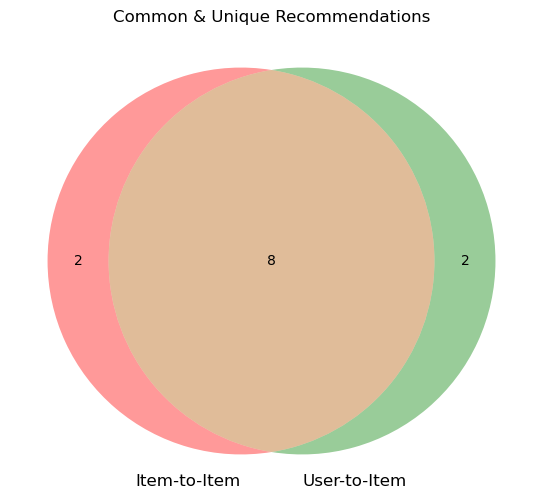

In [645]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Convert to sets
utoi_set = set(utoi_list)
itoi_set = set(itoi_list)


# Create Venn diagram
plt.figure(figsize=(8, 6))
venn2([utoi_set, itoi_set], set_labels=("Item-to-Item", "User-to-Item"))
plt.title("Common & Unique Recommendations")
plt.show()


---

### 📌 **Problem Kya Tha?**

Tu do alag-alag content-based filtering approaches use kar raha tha:

1. **Approach A: Item-to-Item** – Ek item ke similar items dhoondhta hai (based on features).
2. **Approach B: User-to-Item** – User ke pasand ke items ka aggregate banake uske similar items dhoondhta hai.


### 📋 **Kya Mila?**

Dono approaches se **Top 10 smartphones** recommend hue. Humne dono ki list compare ki.



### ✅ **Comparison Ka Result:**

* Dono methods me **8 smartphones same** recommend hue.
* Sirf **2 smartphones alag** the.



### 🔍 **Matlab Kya Nikla? (Conclusion in Simple Terms)**

➡️ **Dono approaches smartly kaam kar rahe hain.**
➡️ Dono ne mostly **same phones recommend kiye**, iska matlab:

* Tera **feature extraction sahi hai** (phones ke feature match acche se ho rahe hain).
* Tera **user profile bhi sahi represent kar raha hai** pasand.



### 💡 Final Baat:

> ✅ **Tera recommendation system consistent hai** — chahe tu directly item ka match kare ya user ki pasand ka profile bana ke chal.
> Dono approaches **similar output de rahe hain**, jo ek **strong sign hai ki model theek se trained hai**.



---

# 👤 2. **Profile-Based Filtering** (User ke Pasand ke Hisab se)

**Kya hota hai?**
Isme system tumhare pasand ke items ko analyze karta hai aur unse tumhara **ek profile** banaata hai.

**Kaise kaam karta hai?**

* Suppose tumne past mein `Romantic`, `Comedy` movies dekhi.
* System samjhega ki tumhein ye genres pasand hain.
* Fir woh tumhaare profile ke basis par naye items suggest karega jo tumhare taste se match karte ho.

🎯 **Example:**
Tum Flipkart pe mostly "electronics + budget smartphones" dekhte ho.
System samajh jaata hai: Ye user ko low-price gadgets pasand hain.
To fir tumhein waise hi naye smartphones suggest karega.




## 🤵 Profile-Based Filtering Data

**Kya hota hai?**

* Ye data **user ke pasand ke items ka summary hota hai**.
* User ne jo products like kiye, unke features ko mila ke ek **user profile vector** banta hai.

**Example:**

* User 1 ne products 1 (Logitech mouse) aur 2 (Apple smartwatch) pasand kiye.
* Toh user profile banega:

  * Brand: Logitech + Apple
  * Category: mouse + wearable
  * Color: black + white
  * Price: average ya sum of 25 and 199

**Use case:**

* User profile ko item features ke saath compare kar ke naye recommendations de sakte hain.




### ✅ **In Profile-Based Filtering**, **you don't need `user_id`** in the main items dataset.

Here’s why:

---

### 🔹 **1. Item-to-Item Approach**

You compare one item’s features to all other items. No user info is required.

* Example: "User liked `Apple Model 1` → show similar items."
* Focus: Only item features.

---

### 🔹 **2. User-to-Item Approach**

You create a **user profile** by averaging the features of items they liked.

* Example: User liked `[Apple Model 1, Apple Model 5]` → aggregate features → compare to other items.
* Still no need for user ID in the item dataset.

---

### 📝 When is `user_id` needed?

Only if:

* You want to store **multiple users' liked items**.
* Or build a **system for multiple users**.

Then, you maintain a **separate mapping table** like:

| user\_id | liked\_items                       |
| -------- | ---------------------------------- |
| 101      | \[Apple Model 1, Apple Model 5]    |
| 102      | \[Samsung Model 2, Google Model 6] |

This is **outside** the item features dataset.




In [646]:
# LOADING DATA:
import pandas as pd
PROFILE_BASED_DATA = FEATURE_DATA
PROFILE_BASED_DATA

,phone_id,model_name,brand,os_version,ram,storage,screen_size,battery,color
0,1,Samsung Model 1,OnePlus,Android 13,8GB,128GB,"6.1""",4500mAh,Blue
1,2,Apple Model 2,OnePlus,iOS 17,12GB,64GB,"6.7""",4500mAh,Blue
2,3,Samsung Model 3,Google,iOS 17,6GB,64GB,"6.7""",3000mAh,Blue
3,4,OnePlus Model 4,OnePlus,iOS 16,12GB,512GB,"5.5""",3000mAh,Blue
4,5,Google Model 5,OnePlus,iOS 16,8GB,128GB,"5.5""",4000mAh,Blue
...,...,...,...,...,...,...,...,...,...
95,96,Google Model 96,Google,Android 13,4GB,64GB,"5.5""",4500mAh,Black
96,97,Xiaomi Model 97,Google,iOS 17,12GB,256GB,"6.5""",5000mAh,Red
97,98,Samsung Model 98,Samsung,iOS 16,4GB,128GB,"6.1""",5000mAh,Red
98,99,Xiaomi Model 99,Google,Android 13,4GB,256GB,"6.7""",4000mAh,Green


### **Approach A: Item-to-Item (Compare 1 item’s features with others)**

In [647]:
FEATURES_num

,brand_Apple,brand_Google,brand_OnePlus,brand_Samsung,brand_Xiaomi,os_version_Android 12,os_version_Android 13,os_version_iOS 16,os_version_iOS 17,ram_12GB,...,"screen_size_6.7""",battery_3000mAh,battery_4000mAh,battery_4500mAh,battery_5000mAh,color_Black,color_Blue,color_Green,color_Red,color_White
0,False,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,False,False,True,False,False,False,False,False,True,True,...,True,False,False,True,False,False,True,False,False,False
2,False,True,False,False,False,False,False,False,True,False,...,True,True,False,False,False,False,True,False,False,False
3,False,False,True,False,False,False,False,True,False,True,...,False,True,False,False,False,False,True,False,False,False
4,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,True,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,False
96,False,True,False,False,False,False,False,False,True,True,...,False,False,False,False,True,False,False,False,True,False
97,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
98,False,True,False,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False


In [649]:
# FEATURES_DF: preprocessed numerical features of all items
item_vector = PROFILE_BASED_DATA.loc['Samsung Model 1'].values.reshape(1, -1)
similarities = cosine_similarity(item_vector, PROFILE_BASED_DATA)[0]

KeyError: 'Samsung Model 1'

---

# 📜 3. **Textual Content-Based Filtering** (Item ke Description/Text ke Basis par)

**Kya hota hai?**
Agar kisi item ke paas text hai (jaise movie ka summary, product ka description), to system us text ko read karta hai aur samajhta hai ki wo item kis type ka hai.

**Kaise kaam karta hai?**

* System **text ko numbers mein convert** karta hai (jaise TF-IDF, BERT ke through).
* Fir tumhare liked items ke text aur naye items ke text ko compare karta hai.
* Jo text meaning mein similar hote hain, woh recommend karta hai.

🎯 **Example:**
Tumne ek article padha jiska topic tha: "Machine Learning for Healthcare".
System tumhein recommend karega:
"AI in Medical Diagnosis", "Deep Learning in Hospitals", etc.

🧠 **Tech:**
TF-IDF, word embeddings (word2vec, BERT) – yeh sab methods hain jo text ko samajhne ke liye use hote hain.




---

## Textual Content-Based Filtering Data

**Kya hota hai?**

* Product ki **text descriptions** ya reviews use karte hain.
* Text ko process karke numerical vectors (jaise TF-IDF ya embeddings) banate hain.

**Example:**

| product\_id | description                             |
| ----------- | --------------------------------------- |
| 1           | "Wireless mouse with ergonomic design"  |
| 2           | "Smartwatch tracking fitness and steps" |

**Use case:**

* Text similarity measure karke similar products recommend karna.




---

## 📚 **Real-Life Example: Amazon Product Recommendation**

### 👇 Scenario:

You searched or bought a **"Wireless Gaming Mouse"** on Amazon.

📝 The product description might say:

> "A high-precision gaming mouse with customizable DPI, ergonomic design, and RGB lighting."

### 🔍 How Amazon Uses Textual Content-Based Filtering:

* Amazon reads the **textual description** of the product you liked or bought.
* It converts the description into a vector (using TF-IDF, BERT, etc.).
* Then, it compares this with other products’ descriptions to find similar ones.

### 🛍️ It might recommend:

* "Gaming Mouse with LED lights and 7 buttons"
* "Ergonomic wireless mouse with long battery life"
* "RGB Gaming Mouse with precision tracking"

✅ These suggestions aren’t based on *what other users bought*, but on *what the product talks about* in its **text**.

---

## 📰 Another Real-Life Example: News Apps (like Google News)

### 👇 Scenario:

You read an article titled:

> "AI Revolutionizing the Healthcare Industry in 2025"

📖 Textual content:

> "AI tools are now being used to diagnose diseases, manage hospital workflows, and improve patient care..."

### 📲 You will be recommended articles like:

* "Machine Learning in Medical Diagnosis"
* "Future of Healthcare with Artificial Intelligence"
* "Deep Learning in Clinical Decision Making"

🧠 Because the **text content** is similar — all about AI and healthcare.




In [ ]:
# LOADING DATA:
import pandas as pd
TEXTUAL_CONTENT_DATA = pd.read_json(r"C:\Users\Nagesh Agrawal\OneDrive\Desktop\6_MACHINE LEARNING\1_DATASETS\CONTENT_BASED_FILTERING_DATA\TEXTUAL_CONTENT_BASED.json",lines=True)
# Keep only the 'short_description' column
TEXTUAL_CONTENT_DATA = TEXTUAL_CONTENT_DATA["short_description"].reset_index(drop=True)

# Create a new DataFrame with 'short_description' and 'blog id'
TEXTUAL_CONTENT_DATA = pd.DataFrame({
    "short_description": TEXTUAL_CONTENT_DATA,
    "blog id": range(len(TEXTUAL_CONTENT_DATA))
})

TEXTUAL_CONTENT_DATA

,short_description,blog id
0,Health experts said it is too early to predict...,0
1,He was subdued by passengers and crew when he ...,1
2,"""Until you have a dog you don't understand wha...",2
3,"""Accidentally put grown-up toothpaste on my to...",3
4,Amy Cooper accused investment firm Franklin Te...,4
...,...,...
209522,Verizon Wireless and AT&T are already promotin...,209522
209523,"Afterward, Azarenka, more effusive with the pr...",209523
209524,"Leading up to Super Bowl XLVI, the most talked...",209524
209525,CORRECTION: An earlier version of this story i...,209525





# 🤯 Confusion Point:

Tu soch raha hai:

> **"Jo 3 types maine padhe (Feature-Based, Profile-Based, Textual Content-Based),**
> aur **ye naye do (Item-to-Item, User-to-Item Content-Based)** —
> kya ye alag-alag techniques hain ya related hain?"

---

## 💡 Sach kya hai?

### ✅ **Item-to-Item** aur **User-to-Item**

➡ Ye **approaches hain** (ya style of applying) content-based filtering.

### ✅ **Feature-Based, Profile-Based, Textual**

➡ Ye **data ke type** par based categories hain — yani tum *kis information* ka use kar rahe ho.

---

## 🧠 Visual Samajh:

```
🔲 CONTENT-BASED FILTERING (Parent Category)
    ├── 📦 Based on Data:
    │     ├── 🟨 Feature-Based (genre, brand, color, etc.)
    │     ├── 🟦 Textual Content-Based (description, summary, etc.)
    │     └── 🟩 Profile-Based (user ke liked items ka profile)
    │
    └── 🛠️ Based on Style:
          ├── 🟥 Item-to-Item (ek item se similar dhoondo)
          └── 🟧 User-to-Item (user ke profile se match karo)
```

---

## ✅ **Breakdown with Real-Life Examples:**

| Category                    | Type              | Data Used                   | Real Life Example                     |
| --------------------------- | ----------------- | --------------------------- | ------------------------------------- |
| **Content-Based Filtering** | **Feature-Based** | Structured item features    | Netflix → Movie genre, actors, year   |
|                             | **Textual-Based** | Description or summary text | Amazon → Product description matching |
|                             | **Profile-Based** | User’s liked item content   | Spotify → Songs user liked            |
|                             | **Item-to-Item**  | Features or text of 1 item  | Amazon → "People also viewed"         |
|                             | **User-to-Item**  | Combined liked item profile | Netflix → "Recommended for You"       |

---

## 🔁 So Final Answer:

> ✅ **Nahi bhai — alag nahi hain.**
> **Item-to-Item** aur **User-to-Item** are *approaches* inside Content-Based Filtering.
> Aur **Feature, Textual, Profile** are *data ke types* jinpe filtering hoti hai.

🧠 In short:

* **Kya use kar rahe ho?** → Feature, Text, Profile
* **Kaise use kar rahe ho?** → Item-to-Item ya User-to-Item

---

## 🏁 Example Mapping:

| You liked...                              | What happens                                            | Type(s) Involved             |
| ----------------------------------------- | ------------------------------------------------------- | ---------------------------- |
| A product with “RGB, ergonomic, wireless” | Finds similar description products                      | Textual + Item-to-Item       |
| Mostly Adidas shoes + sports watches      | Creates profile → suggests similar brand & sporty items | Feature-Based + User-to-Item |
| Watched only horror movies                | Learns your profile → suggests horror items             | Profile-Based + User-to-Item |

---
